# Data sample analysis: unsupervised learning

## Problem: Retail customer segmantation

## Description
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Segmentation Task
The task is to perform customer segmentaion 

## Sample analysis plan
1. Data scheme review
2. Variables analysis
3. Corellation analysis
4. Data clustering
5. Clustering result visualization

## Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile

In [3]:
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [4]:
matplotlib.pyplot.style.use('ggplot')

%matplotlib inline

## Data scheme review

In [5]:
with zipfile.ZipFile('transactions.csv.zip') as zf:
    data = pd.read_csv(zf.open('transactions.csv'), parse_dates=['InvoiceDate'])

In [6]:
data.shape

(392857, 11)

**Data preview**

In [7]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.30,3
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.50,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,54.08,2


In [8]:
data.categ_product.value_counts()

2    112716
4     91827
1     90113
0     56904
3     41297
Name: categ_product, dtype: int64

In [9]:
data[data.categ_product == 4].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.3,4
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.1,4
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,12.6,4
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,12.6,4
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047,United Kingdom,0,19.9,4
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583,France,0,70.8,4
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,0,54.0,4
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,0,204.0,4
48,536372,22633,HAND WARMER UNION JACK,6,2010-12-01 09:01:00,1.85,17850,United Kingdom,0,11.1,4
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,0,15.3,4


**Some descriptive statistic for numeric variables**

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID,QuantityCanceled,TotalPrice,categ_product
count,392857.000000,392857.000000,392857.000000,392857.000000,392857.000000,392857.000000
mean,13.143587,3.139151,15287.588204,0.624314,21.341374,2.053531
std,181.564772,22.466373,1713.458613,175.527084,71.019589,1.358672
min,-720.000000,0.000000,12346.000000,0.000000,-4161.060000,0.000000
25%,2.000000,1.250000,13955.000000,0.000000,4.680000,1.000000
50%,6.000000,1.950000,15150.000000,0.000000,11.800000,2.000000
75%,12.000000,3.750000,16791.000000,0.000000,19.800000,3.000000
max,80995.000000,8142.750000,18287.000000,80995.000000,8142.750000,4.000000


In [11]:
data[data.Quantity < 0].shape

(125, 11)

**Some descriptive statistic for categorical variable**

In [12]:
data.describe(include = [np.object])

,InvoiceNo,StockCode,Description,Country
count,392857,392857,392857,392857
unique,18632,3666,3878,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2023,2016,349347


In [13]:
data[data.InvoiceNo == '576339']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
340029,576339,10135,COLOURING PENCILS BROWN TUBE,14,2011-11-14 15:27:00,2.46,14096,United Kingdom,0,34.44,1
340030,576339,15044A,PINK PAPER PARASOL,1,2011-11-14 15:27:00,5.79,14096,United Kingdom,0,5.79,0
340031,576339,16238,PARTY TIME PENCIL ERASERS,2,2011-11-14 15:27:00,0.42,14096,United Kingdom,0,0.84,1
340032,576339,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,2011-11-14 15:27:00,0.83,14096,United Kingdom,0,0.83,1
340033,576339,17003,BROCADE RING PURSE,2,2011-11-14 15:27:00,0.63,14096,United Kingdom,0,1.26,1
...,...,...,...,...,...,...,...,...,...,...,...
340566,576339,90083,CRYSTAL CZECH CROSS PHONE CHARM,1,2011-11-14 15:27:00,1.63,14096,United Kingdom,0,1.63,2
340567,576339,90086,CRYSTAL FROG PHONE CHARM,1,2011-11-14 15:27:00,1.63,14096,United Kingdom,0,1.63,2
340568,576339,90119,METALIC LEAVES BAG CHARMS,11,2011-11-14 15:27:00,2.46,14096,United Kingdom,0,27.06,4
340569,576339,90166,PINK & WHITE ROSEBUD RING,1,2011-11-14 15:27:00,4.15,14096,United Kingdom,0,4.15,0


**Missing values**

In [14]:
data.isnull().sum(axis = 0)

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
QuantityCanceled    0
TotalPrice          0
categ_product       0
dtype: int64

**Pair plot for expert selected numeric variables**

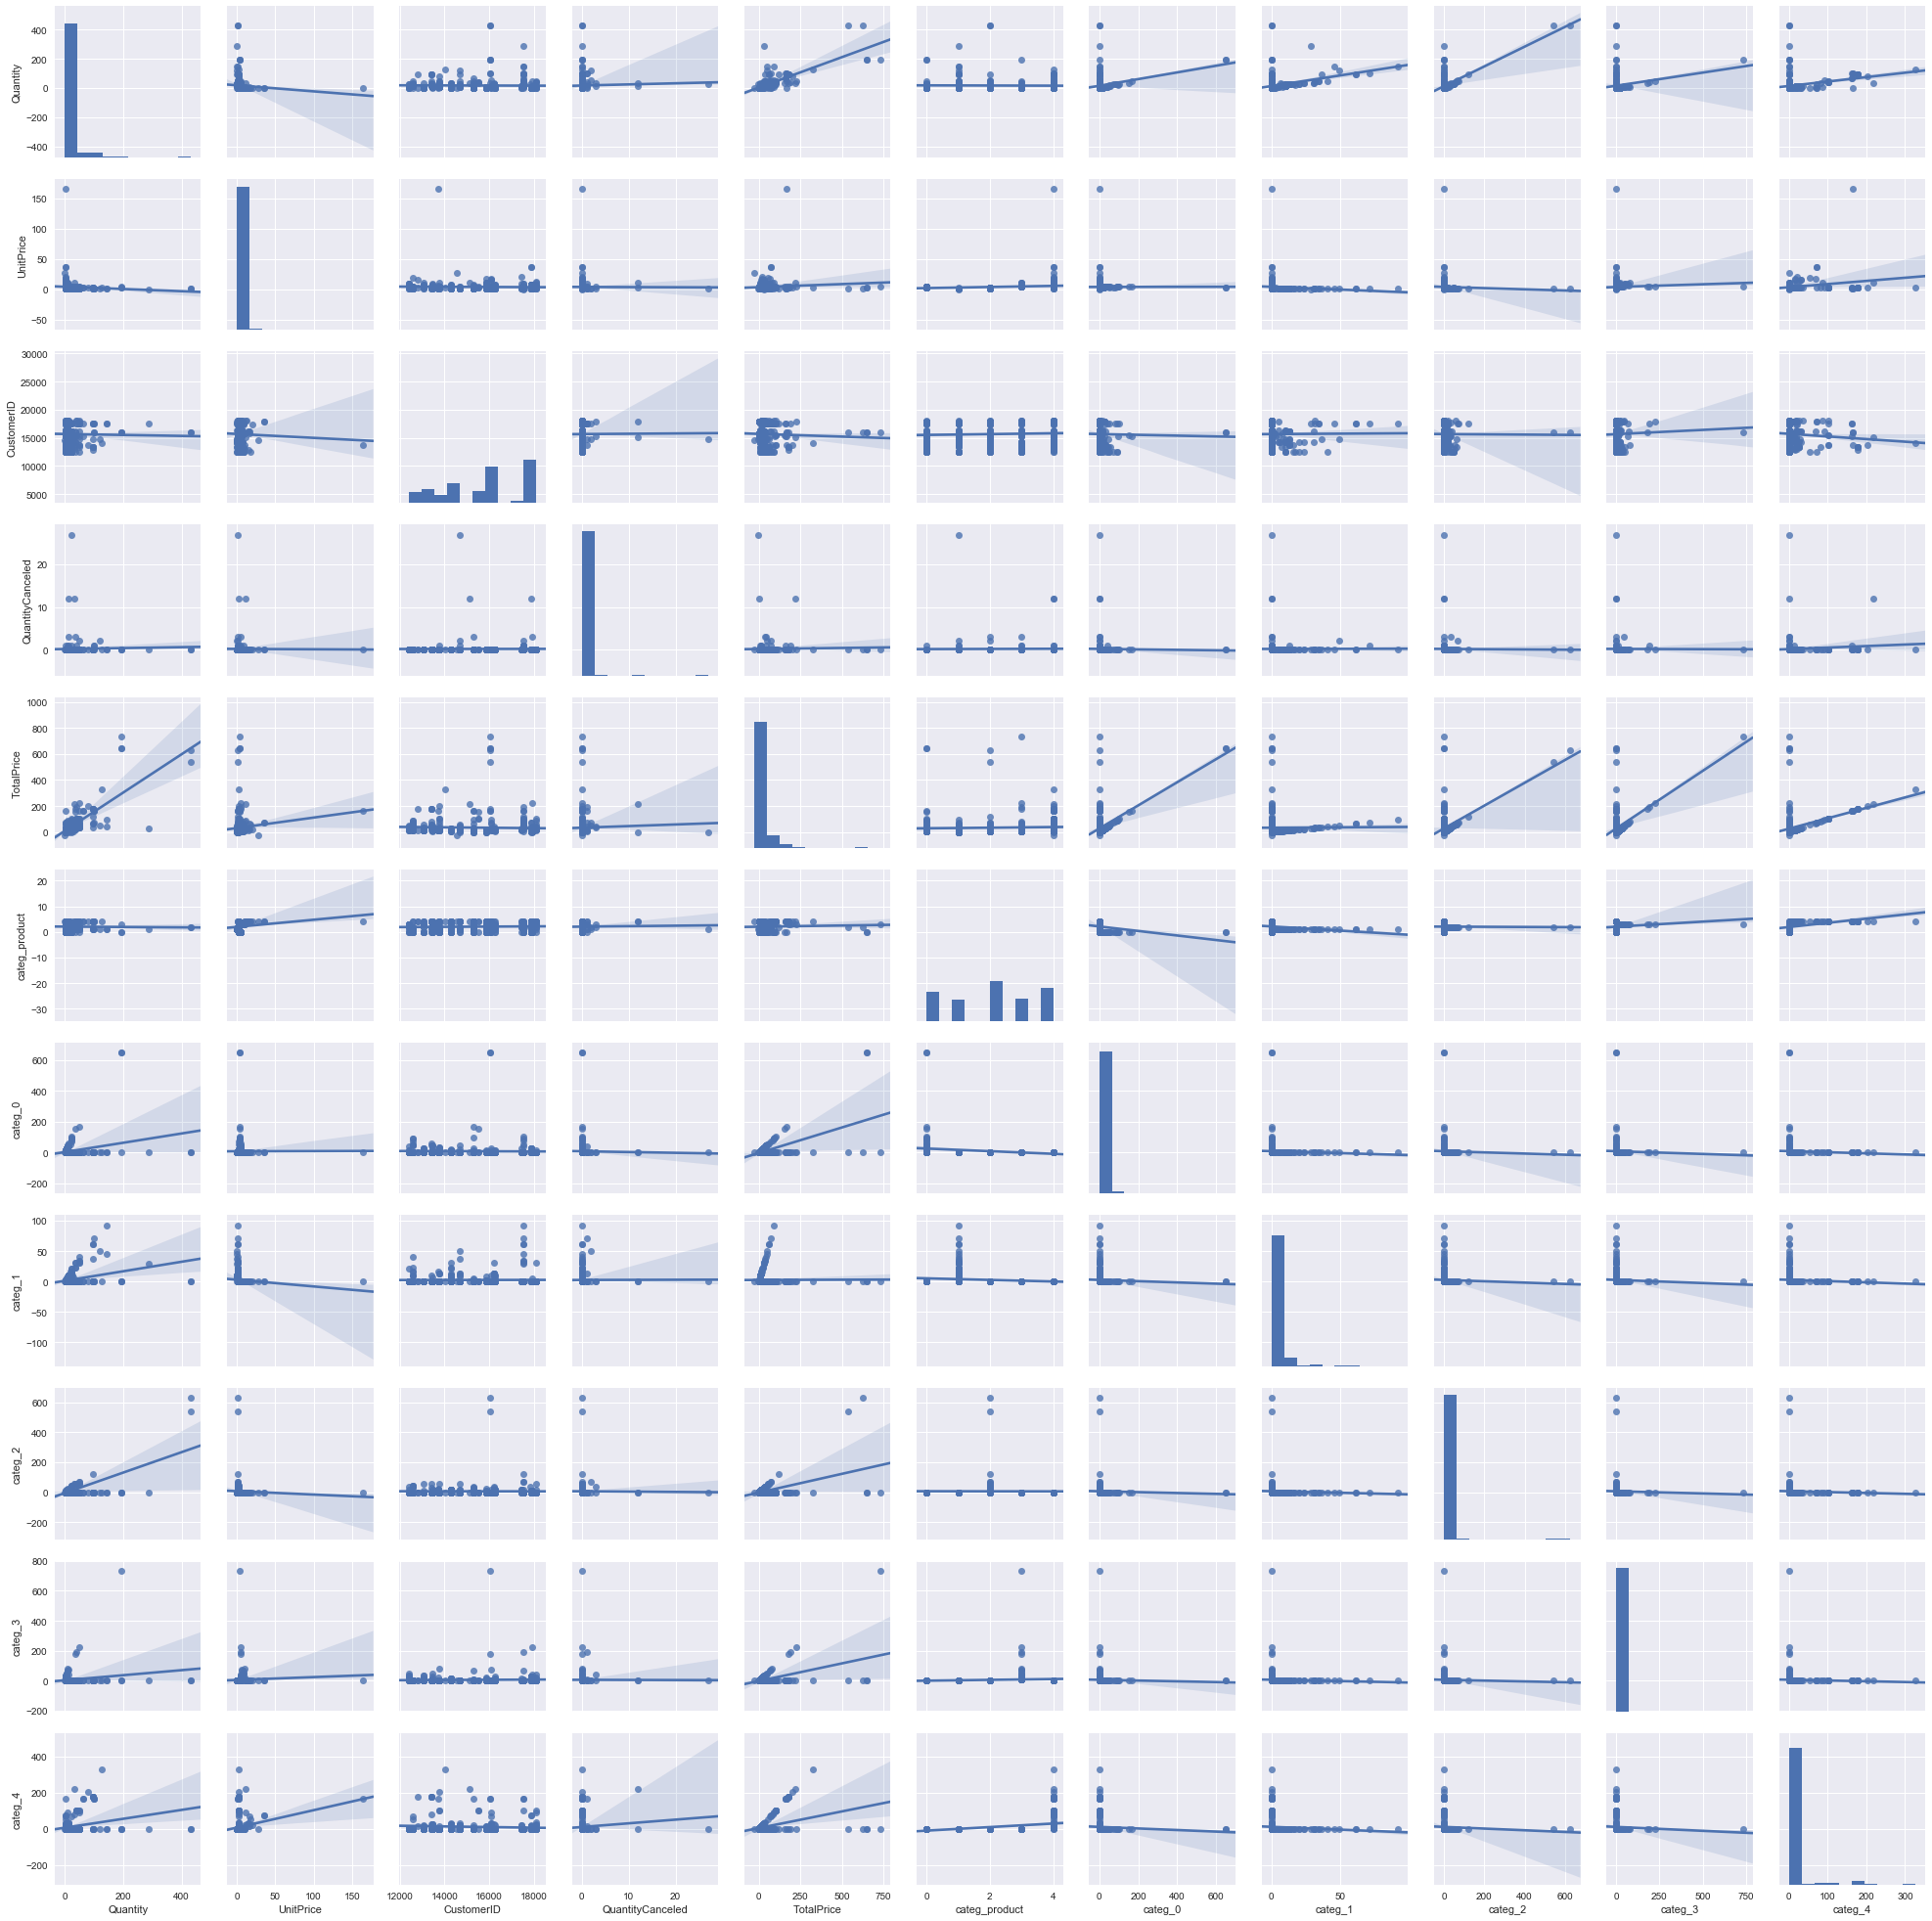

In [101]:
sns.pairplot(data.head(500), size = 2.5, kind = 'reg')
plt.show()

**Bar plot for categorical features**

In [15]:
categorical_variables = data.select_dtypes(include = ['object']).columns

In [16]:
data[categorical_variables].nunique()

InvoiceNo      18632
StockCode       3666
Description     3878
Country           37
dtype: int64

In [17]:
data.Country.value_counts()

United Kingdom          349347
Germany                   9027
France                    8329
EIRE                      7229
Spain                     2480
Netherlands               2364
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      759
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [18]:
data.Country.value_counts().nlargest(10)

United Kingdom    349347
Germany             9027
France              8329
EIRE                7229
Spain               2480
Netherlands         2364
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: Country, dtype: int64

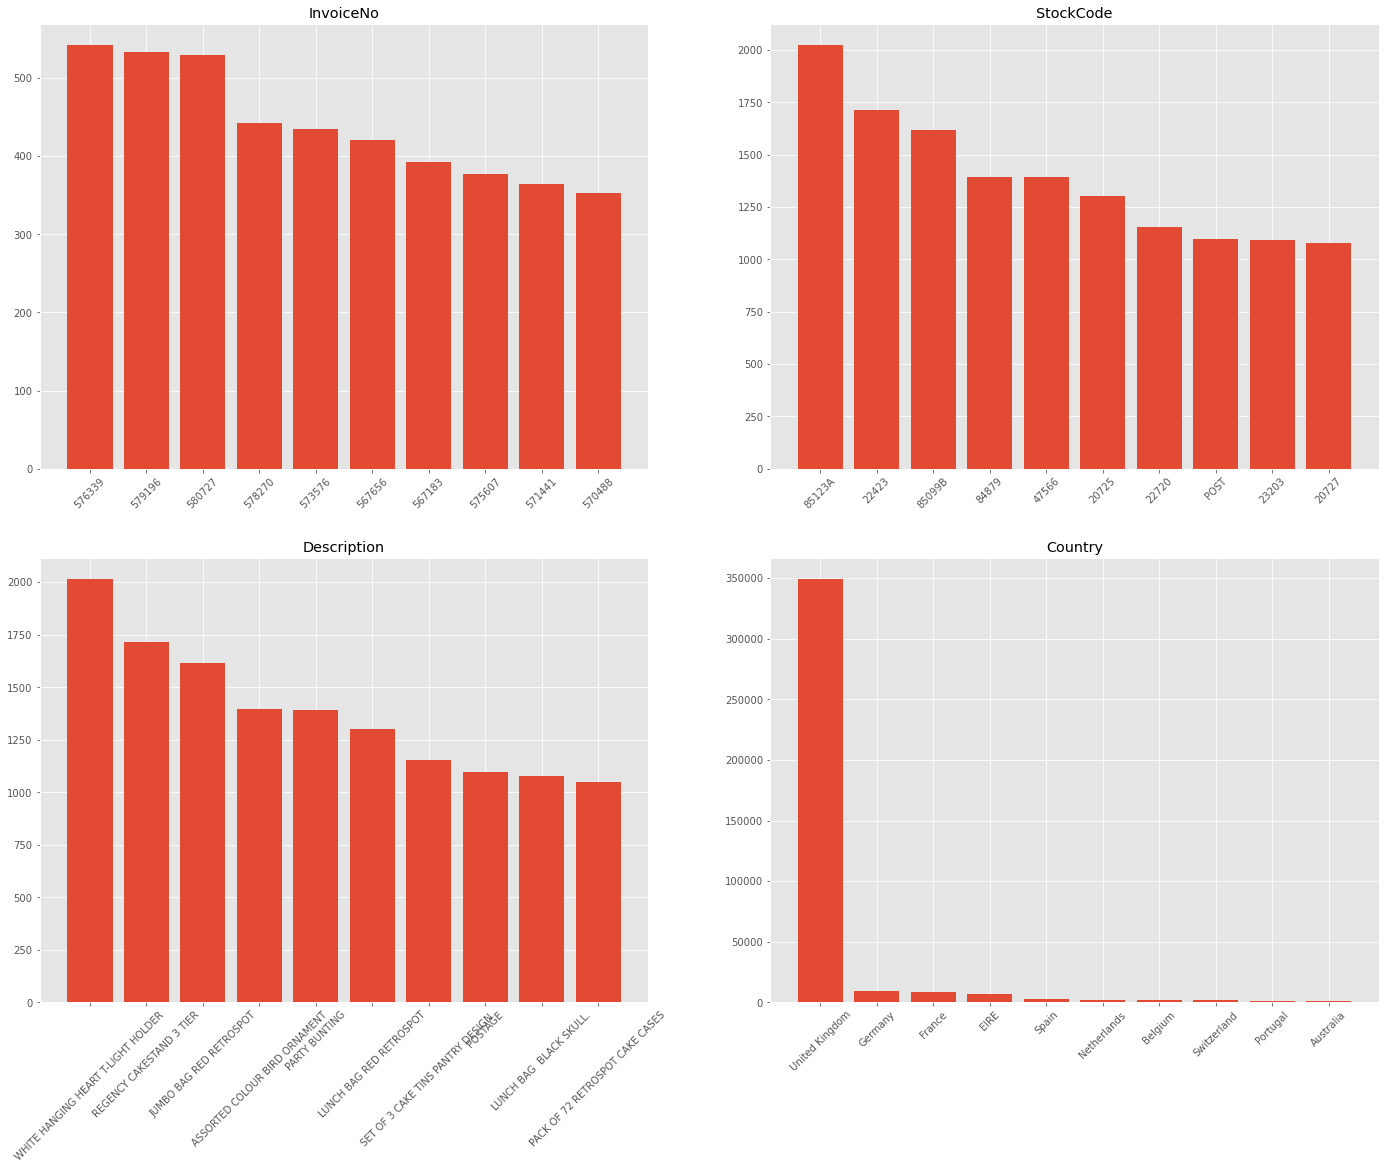

In [19]:
plt.figure(figsize = (24, 18))

plot_number = 0
for feature_name in categorical_variables:
        plot_number += 1
        plt.subplot(2, 2, plot_number)
        plt.bar(x = data[feature_name].value_counts().nlargest(10).index, 
            height = data[feature_name].value_counts().nlargest(10).values)
        plt.title(feature_name)
        plt.xticks(rotation=45)

### Correlation analysis

<AxesSubplot:>

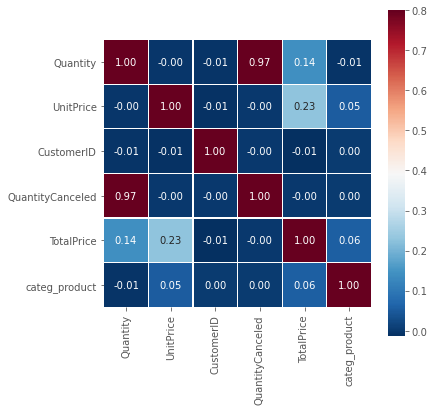

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize = (6, 6))
sns.heatmap(correlation_matrix, vmax = 0.8, cmap = 'RdBu_r', annot = True, fmt = '.2f', square = True,
            annot_kws = {'size':10}, linecolor = 'white', linewidths = 0.1)

## Data clustering

In [21]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.30,3
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.50,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.10,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,54.08,2


### How much money did customers spend for each product category?

In [22]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = data[data['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x : x if x > 0 else 0)
    data.loc[:, col] = price_temp
    data[col].fillna(0, inplace = True)

In [23]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalPrice',
       'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'],
      dtype='object')

In [24]:
data[['CustomerID','InvoiceNo', 'Description', 'UnitPrice', 'Quantity', 'categ_product', 
      'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4', 'TotalPrice']].head(10)

,CustomerID,InvoiceNo,Description,UnitPrice,Quantity,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,TotalPrice
0,17850,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6,4,0.00,0.0,0.00,0.0,15.3,15.30
1,17850,536365,WHITE METAL LANTERN,3.39,6,0,20.34,0.0,0.00,0.0,0.0,20.34
2,17850,536365,CREAM CUPID HEARTS COAT HANGER,2.75,8,0,22.00,0.0,0.00,0.0,0.0,22.00
3,17850,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,6,0,20.34,0.0,0.00,0.0,0.0,20.34
4,17850,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,6,0,20.34,0.0,0.00,0.0,0.0,20.34
5,17850,536365,SET 7 BABUSHKA NESTING BOXES,7.65,2,3,0.00,0.0,0.00,15.3,0.0,15.30
6,17850,536365,GLASS STAR FROSTED T-LIGHT HOLDER,4.25,6,0,25.50,0.0,0.00,0.0,0.0,25.50
7,17850,536366,HAND WARMER UNION JACK,1.85,6,4,0.00,0.0,0.00,0.0,11.1,11.10
8,17850,536366,HAND WARMER RED POLKA DOT,1.85,6,2,0.00,0.0,11.10,0.0,0.0,11.10
9,13047,536367,ASSORTED COLOUR BIRD ORNAMENT,1.69,32,2,0.00,0.0,54.08,0.0,0.0,54.08


### Group orders (amount of money, spent for categories) for a customer

In [25]:
#Summarize total spent for each invoice by categories
basket_price = data.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['categ_{}'.format(i) for i in range(5)]].sum()
basket_price.head()

categ_0  categ_1  categ_2  categ_3  \
CustomerID InvoiceNo InvoiceDate                                               
12346      541431    2011-01-18 10:01:00     0.00     0.00      0.0     0.00   
12347      537626    2010-12-07 14:57:00   293.35    23.40    187.2   124.44   
           542237    2011-01-26 14:30:00   169.20    84.34    130.5     0.00   
           549222    2011-04-07 10:43:00   115.00    81.00    330.9     0.00   
           556201    2011-06-09 13:01:00   168.76    41.40     74.4    19.90   

                                          categ_4  
CustomerID InvoiceNo InvoiceDate                   
12346      541431    2011-01-18 10:01:00     0.00  
12347      537626    2010-12-07 14:57:00    83.40  
           542237    2011-01-26 14:30:00    91.35  
           549222    2011-04-07 10:43:00   109.35  
           556201    2011-06-09 13:01:00    78.06

In [26]:
#Calculate total amount of money spent
basket_price['Basket Price'] = basket_price.sum(1) # sum by rows
basket_price.head()

categ_0  categ_1  categ_2  categ_3  \
CustomerID InvoiceNo InvoiceDate                                               
12346      541431    2011-01-18 10:01:00     0.00     0.00      0.0     0.00   
12347      537626    2010-12-07 14:57:00   293.35    23.40    187.2   124.44   
           542237    2011-01-26 14:30:00   169.20    84.34    130.5     0.00   
           549222    2011-04-07 10:43:00   115.00    81.00    330.9     0.00   
           556201    2011-06-09 13:01:00   168.76    41.40     74.4    19.90   

                                          categ_4  Basket Price  
CustomerID InvoiceNo InvoiceDate                                 
12346      541431    2011-01-18 10:01:00     0.00          0.00  
12347      537626    2010-12-07 14:57:00    83.40        711.79  
           542237    2011-01-26 14:30:00    91.35        475.39  
           549222    2011-04-07 10:43:00   109.35        636.25  
           556201    2011-06-09 13:01:00    78.06        382.52

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4,0.00,0.0,0.0,0.0,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0,20.34,0.0,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,0,22.00,0.0,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0,20.34,0.0,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,0,20.34,0.0,0.0,0.0,0.0


In [28]:
basket_price.reset_index(inplace = True)
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True).head(10)

,CustomerID,InvoiceNo,InvoiceDate,categ_0,categ_1,categ_2,categ_3,categ_4,Basket Price
1,12347,537626,2010-12-07 14:57:00,293.35,23.40,187.2,124.44,83.40,711.79
2,12347,542237,2011-01-26 14:30:00,169.20,84.34,130.5,0.00,91.35,475.39
3,12347,549222,2011-04-07 10:43:00,115.00,81.00,330.9,0.00,109.35,636.25
4,12347,556201,2011-06-09 13:01:00,168.76,41.40,74.4,19.90,78.06,382.52
5,12347,562032,2011-08-02 08:48:00,158.16,61.30,109.7,97.80,157.95,584.91
6,12347,573511,2011-10-31 12:25:00,368.72,154.30,203.3,55.60,512.40,1294.32
7,12347,581180,2011-12-07 15:52:00,0.00,38.58,100.8,30.00,55.44,224.82
8,12348,539318,2010-12-16 19:09:00,0.00,478.80,174.0,0.00,240.00,892.80
9,12348,541998,2011-01-25 10:42:00,0.00,187.44,0.0,0.00,40.00,227.44
10,12348,548955,2011-04-05 10:47:00,0.00,17.00,310.0,0.00,40.00,367.00


In [29]:
basket_price.shape

(18429, 9)

### Group the statistics calculated over basket price for each customer 
We add features that describe the customer, such as: the number of purchases made by the customer, the minimum / maximum / average purchase price

In [30]:
transactions_per_user = basket_price.groupby(by = ['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
#basket_price.groupby(by = ['CustomerID'])['categ_0'].sum()

In [31]:
transactions_per_user.sort_values('CustomerID', ascending = True).head(10)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252
5,12353,1,89.00,89.00,89.000000,89.00,0.000000,0.000000,13.033708,22.359551,64.606742
6,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,14.950899,31.176580,16.235872,17.935890
7,12355,1,459.40,459.40,459.400000,459.40,25.272094,0.000000,53.286896,0.000000,21.441010
8,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,14.147605,28.062232,13.184749,37.349320
9,12357,1,6207.67,6207.67,6207.670000,6207.67,28.350089,5.089832,18.475531,25.189000,22.895547


In [32]:
transactions_per_user.shape

(4327, 11)

We also add the following features: the number of days elapsed from the first and last purchases

In [33]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by = ['CustomerID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by =['CustomerID'])['InvoiceDate'].max())

days_since_first_registration = first_registration.applymap(lambda x:(last_date - x.date()).days)
days_since_last_purchase = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = days_since_last_purchase.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = days_since_first_registration.reset_index(drop = False)['InvoiceDate']

In [34]:
transactions_per_user.head(10)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459,2,367
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714,75,358
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728,18,18
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440,310,310
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252,36,296
5,12353,1,89.00,89.00,89.000000,89.00,0.000000,0.000000,13.033708,22.359551,64.606742,204,204
6,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,14.950899,31.176580,16.235872,17.935890,232,232
7,12355,1,459.40,459.40,459.400000,459.40,25.272094,0.000000,53.286896,0.000000,21.441010,214,214
8,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,14.147605,28.062232,13.184749,37.349320,22,325
9,12357,1,6207.67,6207.67,6207.670000,6207.67,28.350089,5.089832,18.475531,25.189000,22.895547,33,33


We may be particularly interested in customers segmets. 
For instance, let's see how many customers made only one purchase.

In [35]:
(transactions_per_user['count'] == 1).mean()

0.34365611278021724

## Data clustering

In [36]:
transactions_per_user.head()

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459,2,367
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714,75,358
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728,18,18
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440,310,310
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252,36,296


In [37]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4',
            'LastPurchase', 'FirstPurchase']

matrix = transactions_per_user[list_cols].values

In [38]:
matrix[:10]

array([[7.00000000e+00, 2.24820000e+02, 1.29432000e+03, 6.15714286e+02,
        2.95403712e+01, 1.12371230e+01, 2.63758701e+01, 7.60417633e+00,
        2.52424594e+01, 2.00000000e+00, 3.67000000e+02],
       [4.00000000e+00, 2.27440000e+02, 8.92800000e+02, 4.49310000e+02,
        0.00000000e+00, 3.80160691e+01, 4.19532172e+01, 0.00000000e+00,
        2.00307138e+01, 7.50000000e+01, 3.58000000e+02],
       [1.00000000e+00, 1.75755000e+03, 1.75755000e+03, 1.75755000e+03,
        1.07137777e+01, 4.51310062e+00, 2.65062160e+01, 2.03891781e+01,
        3.78777275e+01, 1.80000000e+01, 1.80000000e+01],
       [1.00000000e+00, 3.34400000e+02, 3.34400000e+02, 3.34400000e+02,
        0.00000000e+00, 1.16925837e+01, 4.84449761e+01, 0.00000000e+00,
        3.98624402e+01, 3.10000000e+02, 3.10000000e+02],
       [7.00000000e+00, 1.44350000e+02, 8.40300000e+02, 3.40815714e+02,
        1.46015232e+01, 1.29940353e+00, 1.57051779e+01, 1.46916432e+01,
        5.37022522e+01, 3.60000000e+01, 2.96000000e+

### Kmeans clustering

**Features normalization**

In [5]:
import sklearn.preprocessing as preprocessing

In [40]:
scaler = StandardScaler()
scaler.fit(matrix)
scaled_matrix = scaler.transform(matrix)

In [41]:
matrix[:5]

array([[7.00000000e+00, 2.24820000e+02, 1.29432000e+03, 6.15714286e+02,
        2.95403712e+01, 1.12371230e+01, 2.63758701e+01, 7.60417633e+00,
        2.52424594e+01, 2.00000000e+00, 3.67000000e+02],
       [4.00000000e+00, 2.27440000e+02, 8.92800000e+02, 4.49310000e+02,
        0.00000000e+00, 3.80160691e+01, 4.19532172e+01, 0.00000000e+00,
        2.00307138e+01, 7.50000000e+01, 3.58000000e+02],
       [1.00000000e+00, 1.75755000e+03, 1.75755000e+03, 1.75755000e+03,
        1.07137777e+01, 4.51310062e+00, 2.65062160e+01, 2.03891781e+01,
        3.78777275e+01, 1.80000000e+01, 1.80000000e+01],
       [1.00000000e+00, 3.34400000e+02, 3.34400000e+02, 3.34400000e+02,
        0.00000000e+00, 1.16925837e+01, 4.84449761e+01, 0.00000000e+00,
        3.98624402e+01, 3.10000000e+02, 3.10000000e+02],
       [7.00000000e+00, 1.44350000e+02, 8.40300000e+02, 3.40815714e+02,
        1.46015232e+01, 1.29940353e+00, 1.57051779e+01, 1.46916432e+01,
        5.37022522e+01, 3.60000000e+01, 2.96000000e+

In [42]:
scaled_matrix[:5]

array([[ 0.35810637, -0.05006989,  0.62967622,  0.55329516,  0.85985881,
        -0.19051109,  0.06362275, -0.4618226 , -0.19151713, -0.90067151,
         1.22257986],
       [-0.033848  , -0.04187289,  0.27637513,  0.17579433, -1.16095081,
         1.59592307,  0.98971167, -0.95034893, -0.46913637, -0.17191211,
         1.14616579],
       [-0.42580236,  4.74527357,  1.0372765 ,  3.14363672, -0.42803839,
        -0.6390733 ,  0.07137195,  0.35954315,  0.48153827, -0.74094343,
        -1.74058765],
       [-0.42580236,  0.29276527, -0.21496609, -0.08488779, -1.16095081,
        -0.16012712,  1.37565326, -0.95034893,  0.58725994,  2.1740942 ,
         0.73862413],
       [ 0.35810637, -0.30183067,  0.23017991, -0.07033325, -0.16208393,
        -0.85346032, -0.57076061, -0.006492  ,  1.32447897, -0.56124933,
         0.61975781]])

In [43]:
#other option: use scaler.fit_transform

**Clustering**

In [44]:
n_clusters = 6
kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 200, max_iter = 600)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)

In [45]:
#Cluster sizes
pd.Series(clusters_clients).value_counts()

0    1415
2    1155
1     832
4     826
3      73
5      26
dtype: int64

## How to plot clusters?

### PCA main components

**Plot explaoned variance by components**

In [46]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

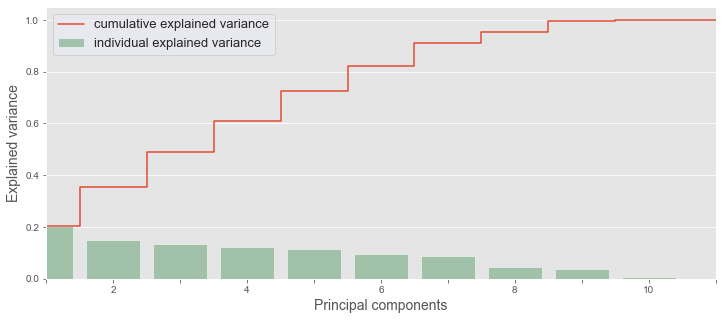

In [47]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.set(font_scale=1)
plt.step(range(pca_samples.shape[1]), pca.explained_variance_ratio_.cumsum(), where = 'mid',
         label = 'cumulative explained variance')
sns.barplot(np.arange(1, pca_samples.shape[1] + 1), pca.explained_variance_ratio_, alpha = 0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

### Kmeans clustering visualization by PCA components

In [48]:
pca = PCA() #(n_components = 2)
matrix_by_pca = pca.fit_transform(scaled_matrix)

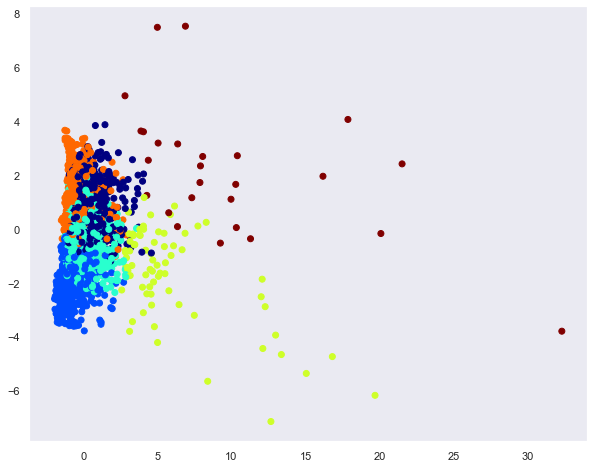

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(matrix_by_pca[:,0], matrix_by_pca[:,1], c = clusters_clients, alpha = 1);
plt.set_cmap('jet')
plt.grid()

### Kmeans clustering visualization by t-SNE components 

In [52]:
%%time
from sklearn.manifold import TSNE
matrix_by_tsne = TSNE().fit_transform(scaled_matrix)

Wall time: 1min


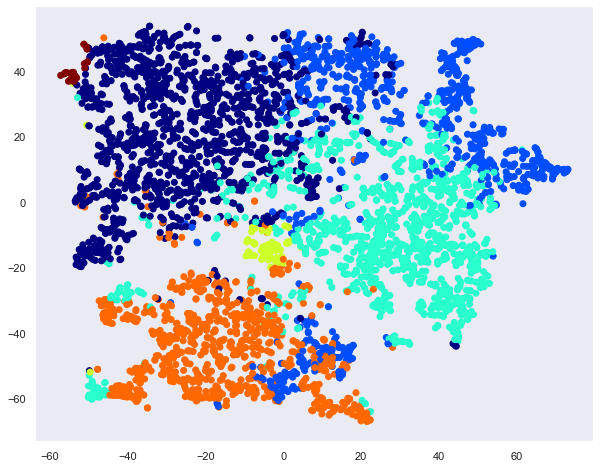

In [53]:
plt.figure(figsize = (10,8))
plt.scatter(matrix_by_tsne[:,0], matrix_by_tsne[:,1], c = clusters_clients, alpha = 1);
plt.set_cmap('jet')
plt.grid()

### Clusters representation

In [54]:
selected_customers = transactions_per_user.copy()
selected_customers.loc[:, 'cluster'] = clusters_clients

In [55]:
selected_customers.head(10)

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,11.237123,26.375870,7.604176,25.242459,2,367,0
1,12348,4,227.44,892.80,449.310000,1797.24,0.000000,38.016069,41.953217,0.000000,20.030714,75,358,1
2,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,4.513101,26.506216,20.389178,37.877728,18,18,3
3,12350,1,334.40,334.40,334.400000,334.40,0.000000,11.692584,48.444976,0.000000,39.862440,310,310,4
4,12352,7,144.35,840.30,340.815714,2385.71,14.601523,1.299404,15.705178,14.691643,53.702252,36,296,0
5,12353,1,89.00,89.00,89.000000,89.00,0.000000,0.000000,13.033708,22.359551,64.606742,204,204,4
6,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,14.950899,31.176580,16.235872,17.935890,232,232,4
7,12355,1,459.40,459.40,459.400000,459.40,25.272094,0.000000,53.286896,0.000000,21.441010,214,214,1
8,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,14.147605,28.062232,13.184749,37.349320,22,325,0
9,12357,1,6207.67,6207.67,6207.670000,6207.67,28.350089,5.089832,18.475531,25.189000,22.895547,33,33,3


In [56]:
merged_df = selected_customers.groupby('cluster').mean()
del merged_df['CustomerID']

In [57]:
merged_df

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
cluster,,,,,,,,,,,,
0,7.821201,150.603139,689.772770,370.818410,3029.921259,17.886219,11.233914,23.439338,15.554146,31.886383,32.832509,316.008481
1,2.530048,210.104796,358.364087,277.856391,721.754605,7.657041,28.863935,43.033890,5.228912,15.216221,100.448317,190.951923
2,2.029437,267.700295,424.584771,339.639708,697.066209,23.302413,11.093229,20.543466,14.744530,30.316362,45.584416,85.554978
3,1.726027,1890.326712,2474.827685,2156.348676,3861.566041,18.404359,11.141932,22.767640,13.334468,34.351601,112.465753,181.876712
4,1.710654,244.625642,327.046949,283.162599,478.539298,15.811878,8.711915,17.664079,23.278583,34.533545,251.202179,287.950363
5,52.846154,187.900000,11102.694615,2668.711017,77928.067692,16.727861,9.507029,21.024223,16.036924,36.703963,25.153846,345.384615
